In [13]:
import webuiapi
from os import system
import os
import time

import inspect
from typing import List, Optional, Union
import numpy as np
import torch
import cv2
import PIL
import gradio as gr
from diffusers import StableDiffusionInpaintPipeline
import torch
import torchvision.transforms as transforms
from PIL import Image, ImageOps
from torchvision.utils import save_image
from diffusers import StableDiffusionInpaintPipeline
import matplotlib.pyplot as plt
%matplotlib inline
from mask_functions import *

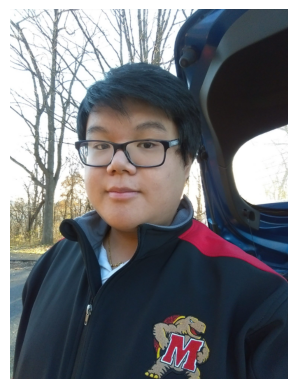

In [14]:
# Load image
im_path = "./ims/ch.png"
image = Image.open(im_path)
#image = image.resize((512,512))
plt.imshow(image)
plt.axis('off');

In [15]:
# Init face detector/predictor
landmark_path = "shape_predictor_68_face_landmarks.dat"
detector, predictor = get_face_predictor_detector(landmark_path)

In [16]:
# Convert image to grayscale numpy
image_gray = np.array(ImageOps.grayscale(image))

# Get mustache mask and resize
mask, debug_image = get_image_mask(image_gray, detector, predictor)
mask = cv2.resize(mask,(512,512))
debug_image = cv2.resize(debug_image,(512,512))
image = cv2.resize(np.array(image),(512,512))

Found 1 face(s)
Time to get image mask:  82.47 ms


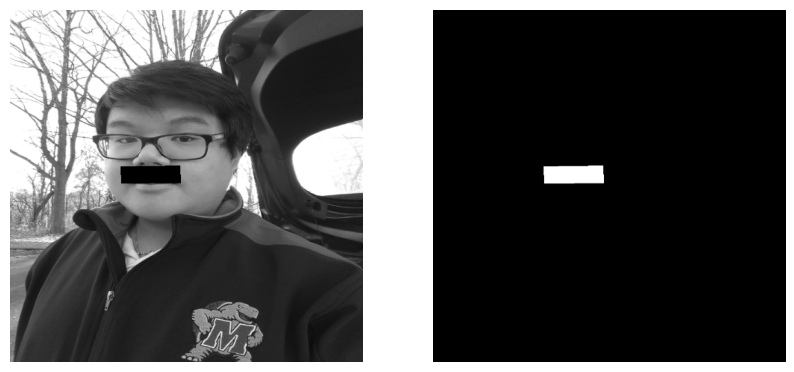

In [17]:
# Look at debug image and mask
fig1 = plt.figure(figsize=(10,5));
ax1,ax2 = fig1.subplots(1,2);
ax1.imshow(debug_image,cmap='gray');
ax2.imshow(mask,cmap='gray'); 
ax1.axis('off');ax2.axis('off');

In [18]:
# Inpainting settings
seed = -1 # -1 for random
prompt = "a man with a mustache, thick mustache, dark mustache, facial hair"
neg_prompt = "blurry, disfigured, ugly, bad anatomy"
steps = 20
cfg_scale = 12
denoise_str = 0.8
mask_weight = 1.0
mask_blur = 0.4
model_name = "sd-v1-5-inpainting.ckpt [c6bbc15e32]"
option_payload = {"sd_model_checkpoint": model_name}

In [19]:
# Run inpainting
# Assumes a local Automatic1111 starter is running
mask = Image.fromarray(mask)
mask = mask.convert("L")

api = webuiapi.WebUIApi(host='127.0.0.1', port=7860, sampler='Euler a', steps=20)

inpainting_result = api.img2img(images=[Image.fromarray(image)],
                                mask_image=mask,
                                inpainting_fill=1,
                                prompt=prompt,
                                negative_prompt=neg_prompt,
                                seed=seed,
                                cfg_scale=cfg_scale,
                                denoising_strength=denoise_str,
                                steps=steps,
                                override_settings=option_payload)

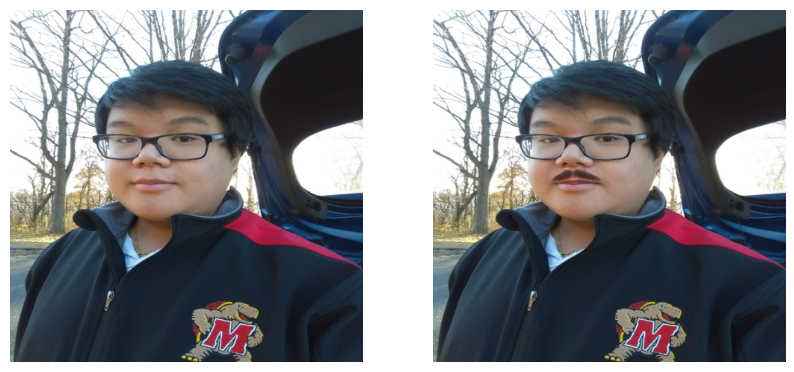

In [20]:
out_im = inpainting_result.image
fig1 = plt.figure(figsize=(10,5))
ax1,ax2=fig1.subplots(1,2)
ax1.imshow(image)
ax2.imshow(out_im)
ax1.axis('off'); ax2.axis('off');